In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten,LSTM, GRU
from sklearn.metrics import roc_auc_score, precision_score, recall_score,confusion_matrix, accuracy_score,confusion_matrix,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cancer_type=['Lung Cancer','Prostate Cancer',' Breast Cancer']

In [4]:
path_lung_cancer_data="/content/drive/MyDrive/Requirementsanddataset/Lungs_Cancer.csv"
path_prostate_cancer_data="/content/drive/MyDrive/Requirementsanddataset/Prostate_Cancer.csv"
path_breast_cancer_data="/content/drive/MyDrive/Requirementsanddataset/Breast_Cancer.csv"

In [5]:
#loading data
lc_df=pd.read_csv(path_lung_cancer_data).dropna(axis=0)
pc_df=pd.read_csv(path_prostate_cancer_data).dropna(axis=0)
bc_df=pd.read_csv(path_breast_cancer_data).dropna(axis=0)

In [6]:
lc_df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
# replacing YES=1 & NO=0
lc_df['LUNG_CANCER']=lc_df['LUNG_CANCER'].replace({'YES':1,'NO':0})
# Gender -> replacing Male=1 & Female=0
lc_df['GENDER']=lc_df['GENDER'].replace({'M':1,'F':0})

In [8]:
print('Malignant Samples:',lc_df[lc_df['LUNG_CANCER']==1].shape[0])
print('Benign Samples:',lc_df[lc_df['LUNG_CANCER']==0].shape[0])

Malignant Samples: 270
Benign Samples: 39


In [9]:
pc_df.head()

,id,diagnosis_result,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059


In [10]:
# Replacing M=1 & B=0
pc_df['diagnosis_result']=pc_df['diagnosis_result'].replace({'M':1,'B':0})
pc_df.drop('id',axis=1,inplace=True)

In [11]:
print('Malignant Samples:',pc_df[pc_df['diagnosis_result']==1].shape[0])
print('Benign Samples:',pc_df[pc_df['diagnosis_result']==0].shape[0])

Malignant Samples: 62
Benign Samples: 38


In [12]:
bc_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [13]:
print('Malignant Samples:',bc_df[bc_df['benign_0__mal_1']==1].shape[0])
print('Benign Samples:',bc_df[bc_df['benign_0__mal_1']==0].shape[0])

Malignant Samples: 357
Benign Samples: 212


#STEP 1
### *Applying at least four advanced deep learning models to diagnose cancer diseases*, i.e., (**MLP**, **CNN**, **RNN** ,and **GRU**).

In [14]:
def evaluate_mlp(x_train,y_train,x_test,y_test,epochs):
  model = MLPClassifier(hidden_layer_sizes=(64, 64), activation='relu', solver='adam', random_state=42,max_iter=1000)
  model.fit(x_train, y_train)

  # Make predictions
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

  # Compute metrics
  auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn + fp)
  fpr = fp / (fp + tn)
  fnr = fn / (fn + tp)
  accuracy= accuracy_score(y_test,y_pred)
  roc=roc_curve(y_test,y_pred)
  return auc, precision, recall, specificity, fpr, fnr, recall, accuracy, confusion_matrix(y_test, y_pred),roc

In [15]:
def evaluate_cnn(x_train, y_train, x_test, y_test,epochs):
  # Reshape the input data to match the expected shape by CNN
  x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1, 1)
  x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1, 1)

  # Build the CNN model
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(x_train.shape[1], 1, 1)))
  model.add(Conv2D(64, kernel_size=(3, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 1)))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))

  # Compiling the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Reshape the input data to match the expected input shape of the CNN
  x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
  x_test = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

  # Training the model
  model.fit(x_train, y_train, epochs=epochs, validation_split=0.2, verbose=0)

  # Make predictions
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

  # Compute metrics
  auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn + fp)
  fpr = fp / (fp + tn)
  fnr = fn / (fn + tp)
  accuracy= accuracy_score(y_test,y_pred)
  roc=roc_curve(y_test,y_pred)
  return auc, precision, recall, specificity, fpr, fnr, recall, accuracy, confusion_matrix(y_test, y_pred),roc


In [16]:
def evaluate_rnn(x_train, y_train, x_test, y_test, epochs):

  x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)

  # Model architecture
  model = Sequential()
  model.add(LSTM(units=64, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(Dense(units=1, activation='sigmoid'))

  # Compiling the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Training the model
  model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

  # Make predictions
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

  # Compute metrics
  auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn + fp)
  fpr = fp / (fp + tn)
  fnr = fn / (fn + tp)
  accuracy= accuracy_score(y_test,y_pred)
  roc=roc_curve(y_test,y_pred)

  return auc, precision, recall, specificity, fpr, fnr, recall, accuracy, confusion_matrix(y_test, y_pred),roc


In [17]:
def evaluate_GRU(x_train, y_train, x_test, y_test, epochs):

  # Reshape x_train to have the correct dimensions
  x_train = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
  x_test = np.array(x_test).reshape(x_test.shape[0],x_test.shape[1],1)

  # Model architecture
  model = Sequential()
  model.add(GRU(units=64, input_shape=(x_train.shape[1], x_train.shape[2])))
  model.add(Dense(units=1, activation='sigmoid'))

  # Compiling the model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Training the model
  model.fit(x_train, y_train, epochs=epochs, batch_size=32, validation_split=0.2, verbose=0)

  # Make predictions
  y_pred = model.predict(x_test)
  y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

  # Compute metrics
  auc = roc_auc_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  specificity = tn / (tn + fp)
  fpr = fp / (fp + tn)
  fnr = fn / (fn + tp)
  accuracy= accuracy_score(y_test,y_pred)
  roc=roc_curve(y_test,y_pred)
  return auc, precision, recall, specificity, fpr, fnr, recall, accuracy, confusion_matrix(y_test, y_pred),roc

In [18]:
#splitting data into test and training set in ratio 70/30
x_train_lc, x_test_lc, y_train_lc, y_test_lc = train_test_split(lc_df.drop('LUNG_CANCER',axis=1),lc_df['LUNG_CANCER'], test_size=0.3, random_state=42)
x_train_pc, x_test_pc, y_train_pc, y_test_pc = train_test_split(pc_df.drop('diagnosis_result',axis=1),pc_df['diagnosis_result'], test_size=0.3, random_state=42)
x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(bc_df.drop('benign_0__mal_1',axis=1),bc_df['benign_0__mal_1'], test_size=0.3, random_state=42)


In [19]:
data={
    'Lung Cancer':[x_train_lc, x_test_lc, y_train_lc, y_test_lc],
    'Breast Cancer':[x_train_pc, x_test_pc, y_train_pc, y_test_pc],
    'Prostate Cancer':[x_train_bc, x_test_bc, y_train_bc, y_test_bc]
}
models={
    'CNN':evaluate_cnn,
    'MLP':evaluate_mlp,
    'RNN':evaluate_rnn,
    'GRU':evaluate_GRU
}

In [30]:
MODEL=[]
CANCER_DISEASES=[]
AUC=[]
PRECISION=[]
SENSITIVITY=[]
SPECIFICITY=[]
FPR=[]
FNR=[]
RECALL=[]
ACCURACY=[]
CM=[]
ROC=[]

for data_name,d in data.items():
  for model_name,func in models.items():
    #training prostate cancer for lower epochs since it converges much quicker due to quality of data
    if data_name=='Prostate Cancer':
      eps=18
    elif data_name=='Lung Cancer':
      eps=100
    else:
      eps=150
    MODEL.append(model_name)
    CANCER_DISEASES.append(data_name)
    au,p,sen,spe,fpr,fnr,recall,acc,cm,roc=func(d[0],d[2],d[1],d[3],eps)
    AUC.append(round(au,2))
    PRECISION.append(round(p,2))
    SENSITIVITY.append(round(sen,2))
    SPECIFICITY.append(round(spe,2))
    FPR.append(round(fpr,2))
    FNR.append(round(fnr,2))
    RECALL.append(round(recall,2))
    ACCURACY.append(round(acc,2)*100)
    CM.append(cm)
    ROC.append(roc)

Table_1={
    'Model':MODEL,
    'Cancer Diseases':CANCER_DISEASES,
    'AUC':AUC,
    'Accuracy':ACCURACY,
    'Precision':PRECISION,
    'Sensitivity':SENSITIVITY,
    'Specificity':SPECIFICITY,
    '(FPR)':FPR,
    '(FNR)':FNR,
    'Recall':RECALL
}

Table_1=pd.DataFrame(Table_1)

6/6 [==============================] - 0s 5ms/step


In [31]:
Table_1

,Model,Cancer Diseases,AUC,Accuracy,Precision,Sensitivity,Specificity,(FPR),(FNR),Recall
0,CNN,Lung Cancer,0.90,94.0,0.99,0.94,0.86,0.14,0.06,0.94
1,MLP,Lung Cancer,0.57,94.0,0.93,1.00,0.14,0.86,0.00,1.00
2,RNN,Lung Cancer,0.85,97.0,0.98,0.99,0.71,0.29,0.01,0.99
3,GRU,Lung Cancer,0.85,97.0,0.98,0.99,0.71,0.29,0.01,0.99
4,CNN,Breast Cancer,0.76,70.0,0.93,0.64,0.88,0.12,0.36,0.64
5,MLP,Breast Cancer,0.77,83.0,0.87,0.91,0.62,0.38,0.09,0.91
6,RNN,Breast Cancer,0.68,77.0,0.83,0.86,0.50,0.50,0.14,0.86
7,GRU,Breast Cancer,0.68,77.0,0.83,0.86,0.50,0.50,0.14,0.86
8,CNN,Prostate Cancer,0.95,96.0,0.95,1.00,0.90,0.10,0.00,1.00
9,MLP,Prostate Cancer,0.95,95.0,0.97,0.94,0.95,0.05,0.06,0.94


In [32]:
Table_1.to_csv('TABLE_1.csv',index=False)

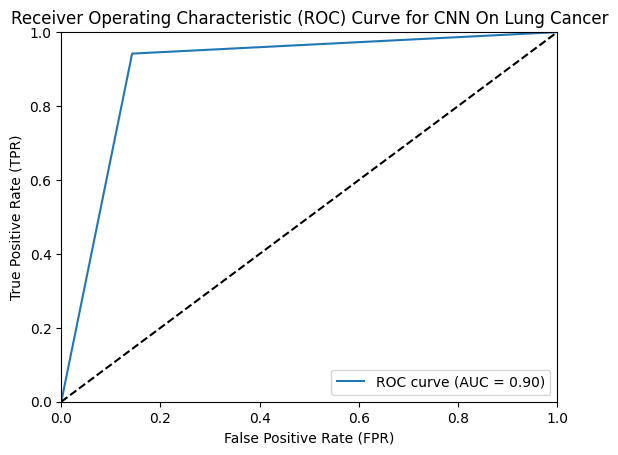

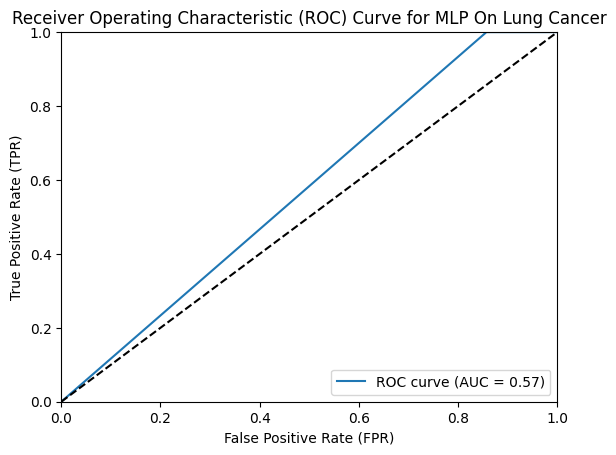

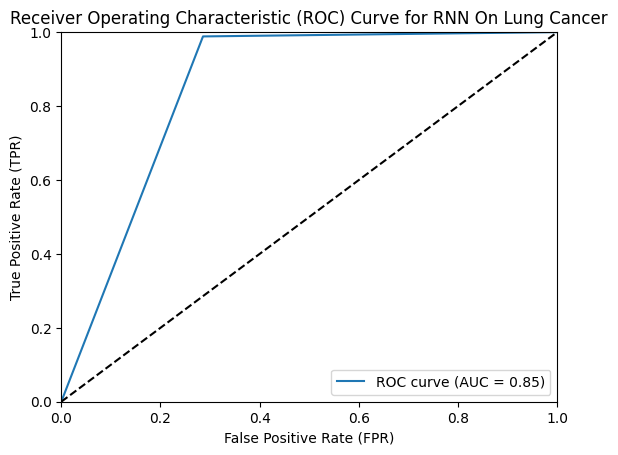

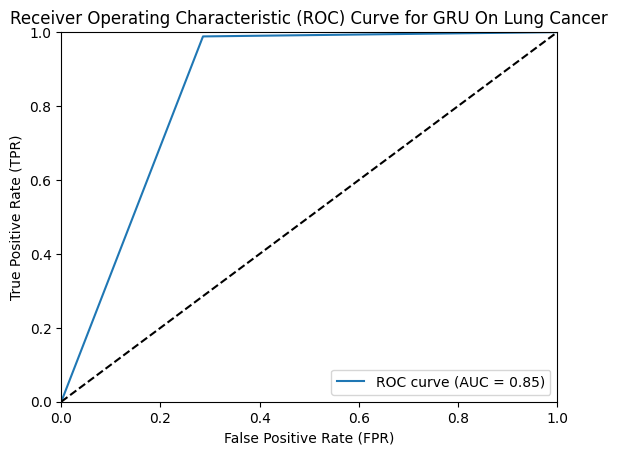

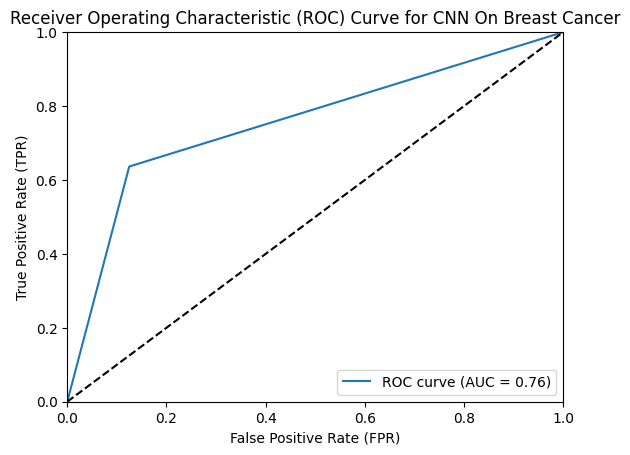

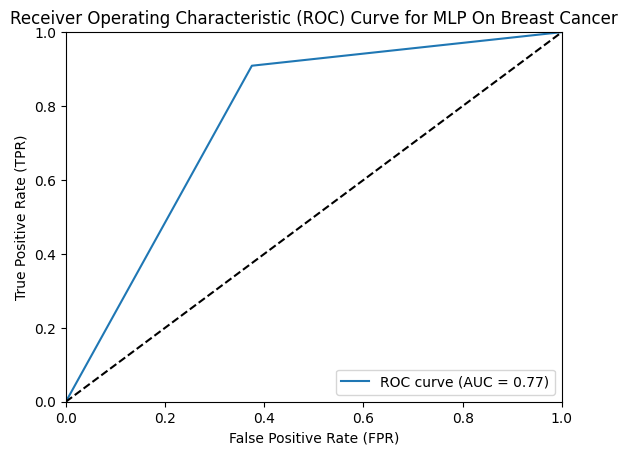

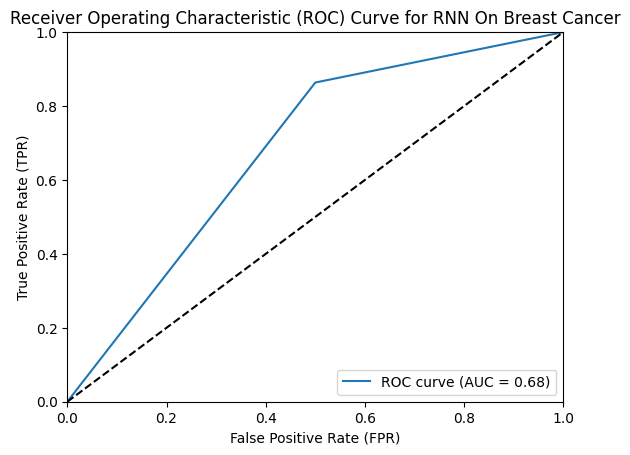

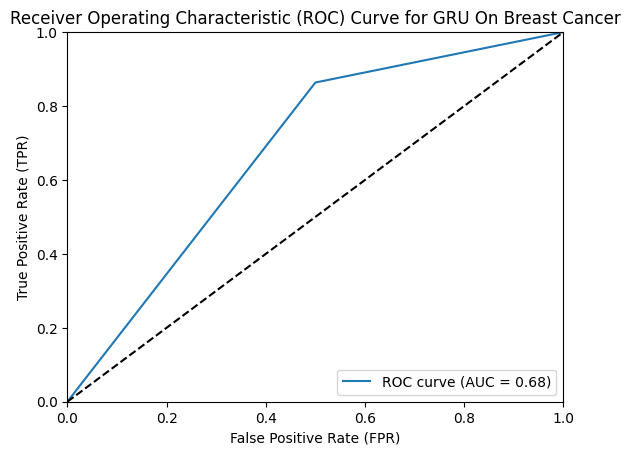

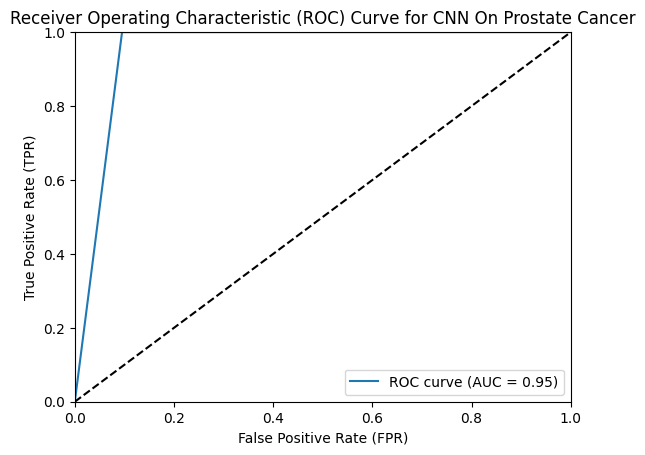

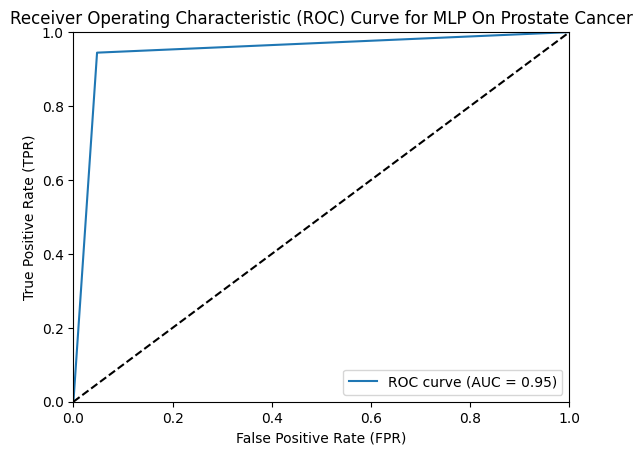

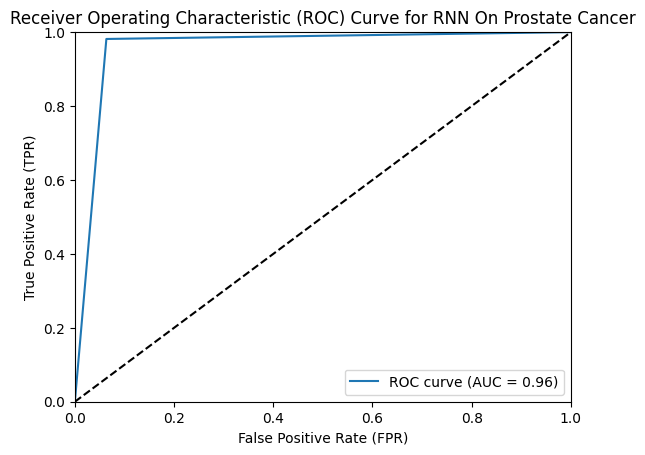

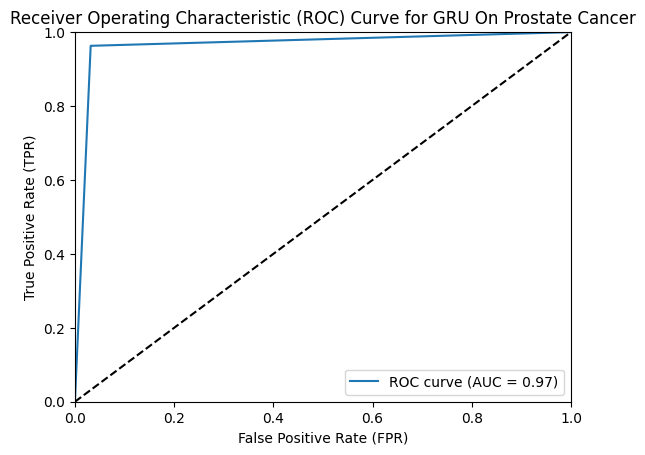

<Figure size 640x480 with 0 Axes>

In [33]:
for i in range(len(ROC)):
  fpr,tpr,threshold=ROC[i]
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve for '+str(MODEL[i])+" On "+str(CANCER_DISEASES[i]))
  plt.legend(loc='lower right')
  plt.show()
  plt.savefig('REAL_DATA_ROC'+str(MODEL[i])+"_"+str(CANCER_DISEASES[i])+'.png')

In [35]:
for i in range(len(CM)):
  print(MODEL[i],' On ',CANCER_DISEASES[i],' Confusion Matrix')
  print(CM[i])

CNN  On  Lung Cancer  Confusion Matrix
[[ 6  1]
 [ 5 81]]
MLP  On  Lung Cancer  Confusion Matrix
[[ 1  6]
 [ 0 86]]
RNN  On  Lung Cancer  Confusion Matrix
[[ 5  2]
 [ 1 85]]
GRU  On  Lung Cancer  Confusion Matrix
[[ 5  2]
 [ 1 85]]
CNN  On  Breast Cancer  Confusion Matrix
[[ 7  1]
 [ 8 14]]
MLP  On  Breast Cancer  Confusion Matrix
[[ 5  3]
 [ 2 20]]
RNN  On  Breast Cancer  Confusion Matrix
[[ 4  4]
 [ 3 19]]
GRU  On  Breast Cancer  Confusion Matrix
[[ 4  4]
 [ 3 19]]
CNN  On  Prostate Cancer  Confusion Matrix
[[ 57   6]
 [  0 108]]
MLP  On  Prostate Cancer  Confusion Matrix
[[ 60   3]
 [  6 102]]
RNN  On  Prostate Cancer  Confusion Matrix
[[ 59   4]
 [  2 106]]
GRU  On  Prostate Cancer  Confusion Matrix
[[ 61   2]
 [  4 104]]


# STEP 2
### applying **GAN** techniques to increase the data of each disease. Which is called synthetic data.

In [36]:
!pip install ctgan
#NOTE: Restart kernel after running this cell

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
lc_categorical_cols=lc_df.columns
pc_categorical_cols=['diagnosis_result']
bc_categorical_cols=['benign_0__mal_1']

In [38]:
from ctgan import CTGAN

Ideal Loss: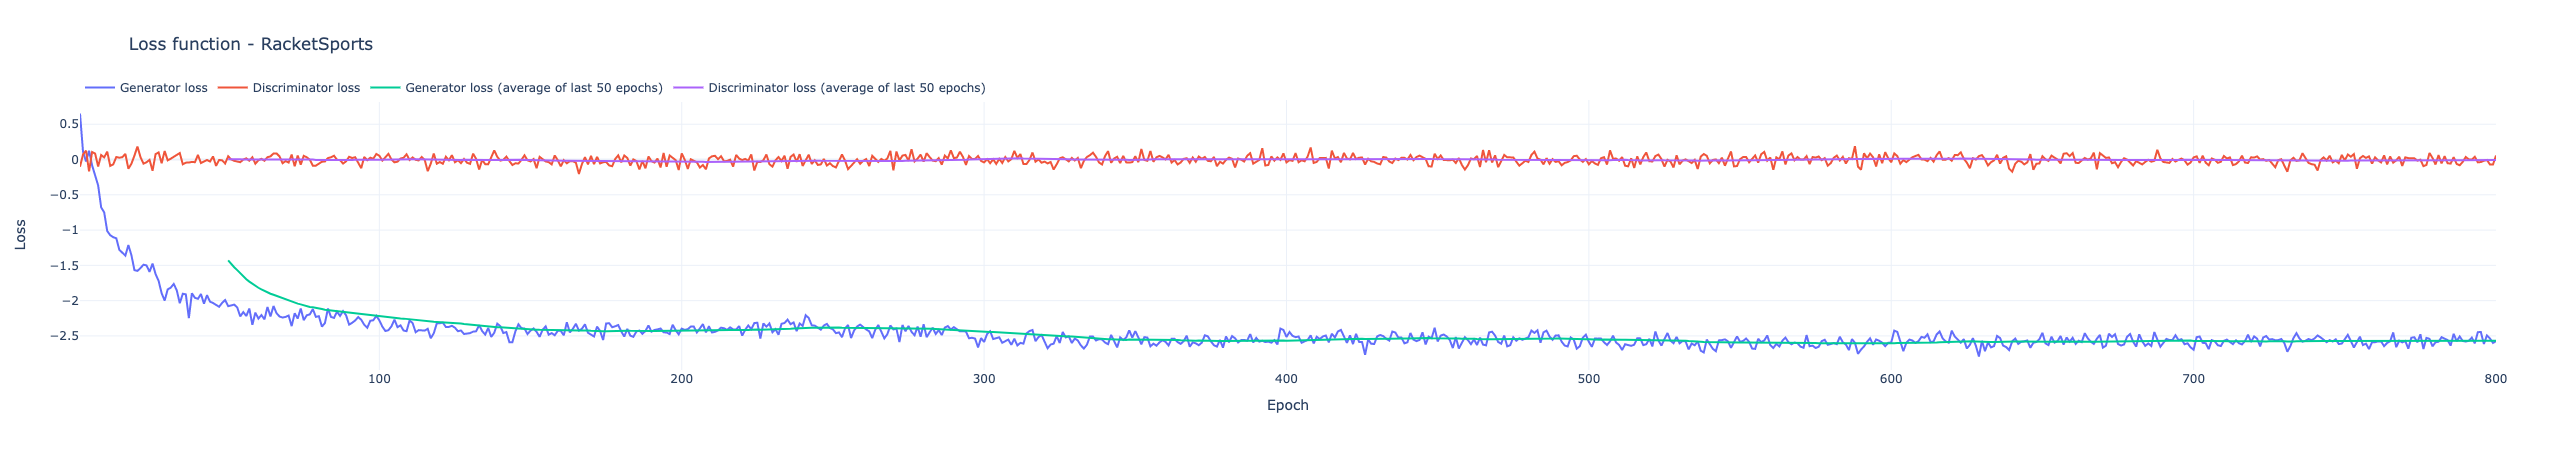


Image Source: https://user-images.githubusercontent.com/98988753/187316196-d2799b53-f5cb-4d3e-8259-d0e70f50ca9d.png

Training GAN on Lung Cancer Dataset

In [39]:
gan_lc=CTGAN(verbose=True)

In [40]:
%%capture output
gan_lc.fit(lc_df,lc_categorical_cols,1800)

In [41]:
output = str(output).split('\n')

In [42]:
raw_values = [line.split(',') for line in output]
raw_values.pop()

['']

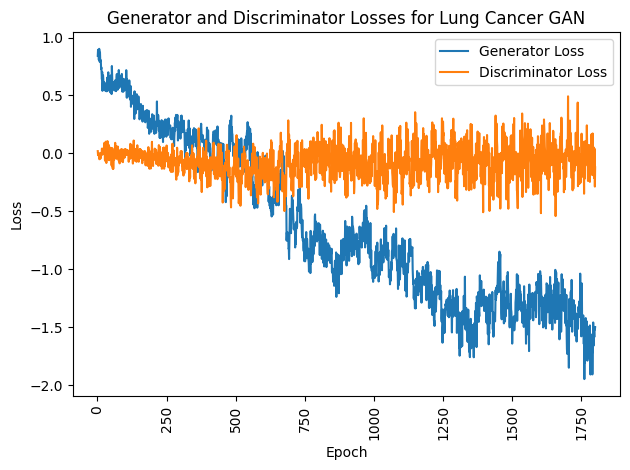

In [43]:
epochNo=[]
g_loss = []
d_loss = []
for sublist in raw_values:
  epoch_value = int(sublist[0].split()[1])  # Extract the epoch value
  g_loss_value = float(sublist[1].split()[2])  # Extract the G loss value
  d_loss_value = float(sublist[2].split()[2])  # Extract the D loss value

  epochNo.append(epoch_value)
  g_loss.append(g_loss_value)
  d_loss.append(d_loss_value)
# Plot generator and discriminator losses
plt.plot(epochNo, g_loss, label='Generator Loss')
plt.plot(epochNo, d_loss, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Losses for Lung Cancer GAN')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Training GAN on prostate Cancer Dataset

In [44]:
gan_pc=CTGAN(verbose=True)

In [45]:
%%capture output
gan_pc.fit(pc_df,pc_categorical_cols,1000)

In [46]:
output = str(output).split('\n')

In [47]:
raw_values = [line.split(',') for line in output]
raw_values.pop()

['']

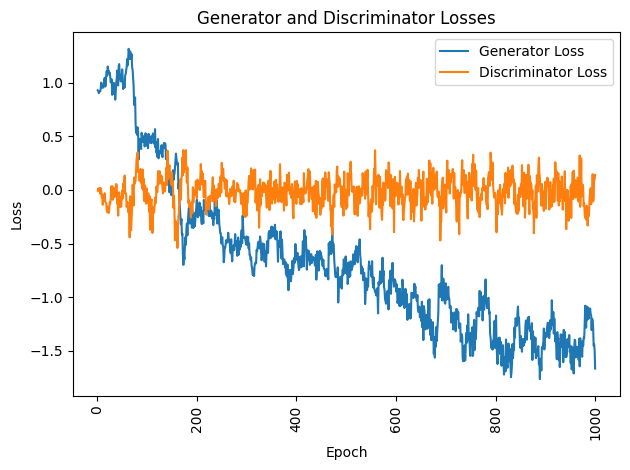

In [48]:
epochNo=[]
g_loss = []
d_loss = []
for sublist in raw_values:
  epoch_value = int(sublist[0].split()[1])  # Extract the epoch value
  g_loss_value = float(sublist[1].split()[2])  # Extract the G loss value
  d_loss_value = float(sublist[2].split()[2])  # Extract the D loss value

  epochNo.append(epoch_value)
  g_loss.append(g_loss_value)
  d_loss.append(d_loss_value)
# Plot generator and discriminator losses
plt.plot(epochNo, g_loss, label='Generator Loss')
plt.plot(epochNo, d_loss, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Losses')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Training GAN on Breast Cancer Dataset

In [49]:
gan_bc=CTGAN(verbose=True)

In [50]:
%%capture output
gan_bc.fit(bc_df,bc_categorical_cols,2100)

In [51]:
output = str(output).split('\n')

In [52]:
raw_values = [line.split(',') for line in output]
raw_values.pop()

['']

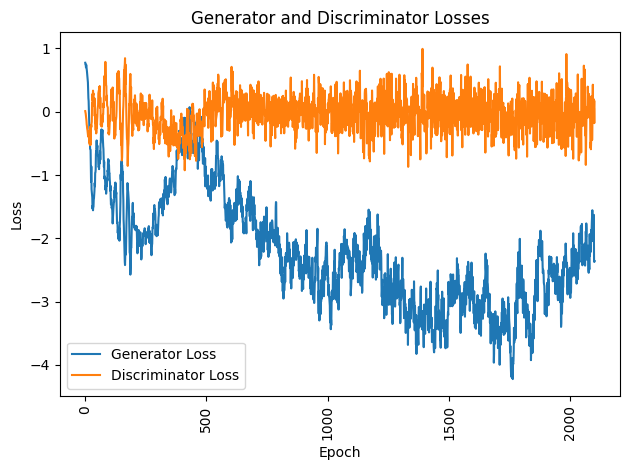

In [53]:
epochNo=[]
g_loss = []
d_loss = []
for sublist in raw_values:
  epoch_value = int(sublist[0].split()[1])  # Extract the epoch value
  g_loss_value = float(sublist[1].split()[2])  # Extract the G loss value
  d_loss_value = float(sublist[2].split()[2])  # Extract the D loss value

  epochNo.append(epoch_value)
  g_loss.append(g_loss_value)
  d_loss.append(d_loss_value)
# Plot generator and discriminator losses
plt.plot(epochNo, g_loss, label='Generator Loss')
plt.plot(epochNo, d_loss, label='Discriminator Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Generator and Discriminator Losses')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [54]:
#generating synthetic data
bc_df_gan=gan_bc.sample(bc_df.shape[0]*2)
lc_df_gan=gan_lc.sample(lc_df.shape[0]*2)
pc_df_gan=gan_pc.sample(pc_df.shape[0]*2)

In [55]:
Lung_cancer_samples =   [len(lc_df[lc_df['LUNG_CANCER']==1]),len(lc_df_gan[lc_df_gan['LUNG_CANCER']==1]),
                     len(lc_df[lc_df['LUNG_CANCER']==0]),len(lc_df_gan[lc_df_gan['LUNG_CANCER']==0])]

prostate_cancer_samples=[len(pc_df[pc_df['diagnosis_result']==1]),len(pc_df_gan[pc_df_gan['diagnosis_result']==1]),
                         len(pc_df[pc_df['diagnosis_result']==0]),len(pc_df_gan[pc_df_gan['diagnosis_result']==0])]

breast_cancer_samples=[len(bc_df[bc_df['benign_0__mal_1']==1]),len(bc_df_gan[bc_df_gan['benign_0__mal_1']==1]),
                         len(bc_df[bc_df['benign_0__mal_1']==0]),len(bc_df_gan[bc_df_gan['benign_0__mal_1']==0])]

In [56]:
sample_counts=[Lung_cancer_samples,prostate_cancer_samples,breast_cancer_samples]
classes=['(Malignant)Cancer Positive','(Benign)Cancer Negative','Sum']
Datasets=[]
Classes=[]
Original_Data=[]
Synthetic_Data=[]
for name in cancer_type:
  Datasets.append("")
  Datasets.append(name)
  Datasets.append("")
for i in range(3):
  for cls in classes:
    Classes.append(cls)
for counts in sample_counts:
  Original_Data.append(counts[0])
  Synthetic_Data.append(counts[1])
  Original_Data.append(counts[2])
  Synthetic_Data.append(counts[3])
  Original_Data.append(counts[0]+counts[2])
  Synthetic_Data.append(counts[1]+counts[3])
Table_2={
    'Datasets':Datasets,
    'Classes':Classes,
    'Orginal Data':Original_Data,
    'Synthetic Data':Synthetic_Data
}
Table_2=pd.DataFrame(Table_2,index=None)

# Table 2

In [57]:
Table_2

,Datasets,Classes,Orginal Data,Synthetic Data
0,,(Malignant)Cancer Positive,270,537
1,Lung Cancer,(Benign)Cancer Negative,39,81
2,,Sum,309,618
3,,(Malignant)Cancer Positive,62,130
4,Prostate Cancer,(Benign)Cancer Negative,38,70
5,,Sum,100,200
6,,(Malignant)Cancer Positive,357,882
7,Breast Cancer,(Benign)Cancer Negative,212,256
8,,Sum,569,1138


In [58]:
Table_2.to_csv('TABLE_2.csv',index=False)

#STEP 3
### repeating step 1 again on newly generated synthetic data and putting the results in Table 3

In [66]:
#splitting synthetic data into test and training set in ratio 70/30
x_train_lc, x_test_lc, y_train_lc, y_test_lc = train_test_split(lc_df_gan.drop('LUNG_CANCER',axis=1),lc_df_gan['LUNG_CANCER'], test_size=0.3, random_state=42)
x_train_pc, x_test_pc, y_train_pc, y_test_pc = train_test_split(pc_df_gan.drop('diagnosis_result',axis=1),pc_df_gan['diagnosis_result'], test_size=0.3, random_state=42)
x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(bc_df_gan.drop('benign_0__mal_1',axis=1),bc_df_gan['benign_0__mal_1'], test_size=0.3, random_state=42)

data_gan={
    'Lung Cancer':[x_train_lc, x_test_lc, y_train_lc, y_test_lc],
    'Breast Cancer':[x_train_pc, x_test_pc, y_train_pc, y_test_pc],
    'Prostate Cancer':[x_train_bc, x_test_bc, y_train_bc, y_test_bc]
}

MODEL=[]
CANCER_DISEASES=[]
AUC=[]
PRECISION=[]
SENSITIVITY=[]
SPECIFICITY=[]
FPR=[]
FNR=[]
RECALL=[]
ACCURACY=[]
CM=[]
ROC=[]

for data_name,d in data.items():
  for model_name,func in models.items():
    #training prostate cancer for lower epochs since it converges much quicker due to quality of data
    if data_name=='Prostate Cancer':
      eps=18
    elif data_name=='Lung Cancer':
      eps=100
    else:
      eps=150
    MODEL.append(model_name)
    CANCER_DISEASES.append(data_name)
    au,p,sen,spe,fpr,fnr,recall,acc,cm,roc=func(d[0],d[2],d[1],d[3],eps)
    AUC.append(round(au,2))
    PRECISION.append(round(p,2))
    SENSITIVITY.append(round(sen,2))
    SPECIFICITY.append(round(spe,2))
    FPR.append(round(fpr,2))
    FNR.append(round(fnr,2))
    RECALL.append(round(recall,2))
    ACCURACY.append(round(acc,2)*100)
    CM.append(cm)
    ROC.append(roc)

Table_3={
    'Model':MODEL,
    'Cancer Diseases':CANCER_DISEASES,
    'AUC':AUC,
    'Accuracy':ACCURACY,
    'Precision':PRECISION,
    'Sensitivity':SENSITIVITY,
    'Specificity':SPECIFICITY,
    '(FPR)':FPR,
    '(FNR)':FNR,
    'Recall':RECALL
}

Table_3=pd.DataFrame(Table_3)

6/6 [==============================] - 0s 5ms/step


In [67]:
Table_3

,Model,Cancer Diseases,AUC,Accuracy,Precision,Sensitivity,Specificity,(FPR),(FNR),Recall
0,CNN,Lung Cancer,0.92,97.0,0.99,0.98,0.86,0.14,0.02,0.98
1,MLP,Lung Cancer,0.57,94.0,0.93,1.00,0.14,0.86,0.00,1.00
2,RNN,Lung Cancer,0.92,97.0,0.99,0.98,0.86,0.14,0.02,0.98
3,GRU,Lung Cancer,0.57,92.0,0.93,0.99,0.14,0.86,0.01,0.99
4,CNN,Breast Cancer,0.50,73.0,0.73,1.00,0.00,1.00,0.00,1.00
5,MLP,Breast Cancer,0.77,83.0,0.87,0.91,0.62,0.38,0.09,0.91
6,RNN,Breast Cancer,0.70,73.0,0.85,0.77,0.62,0.38,0.23,0.77
7,GRU,Breast Cancer,0.66,73.0,0.82,0.82,0.50,0.50,0.18,0.82
8,CNN,Prostate Cancer,0.95,94.0,0.99,0.92,0.98,0.02,0.08,0.92
9,MLP,Prostate Cancer,0.95,95.0,0.97,0.94,0.95,0.05,0.06,0.94


In [68]:
Table_3.to_csv('TABLE_3.csv',index=False)

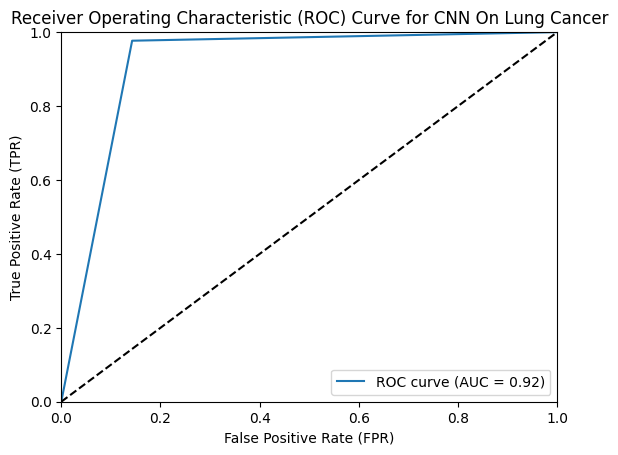

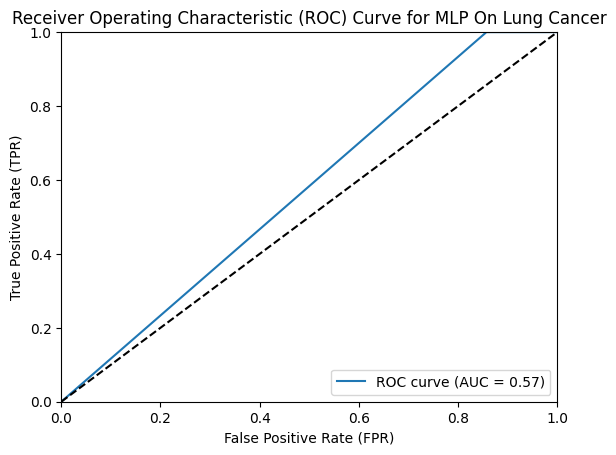

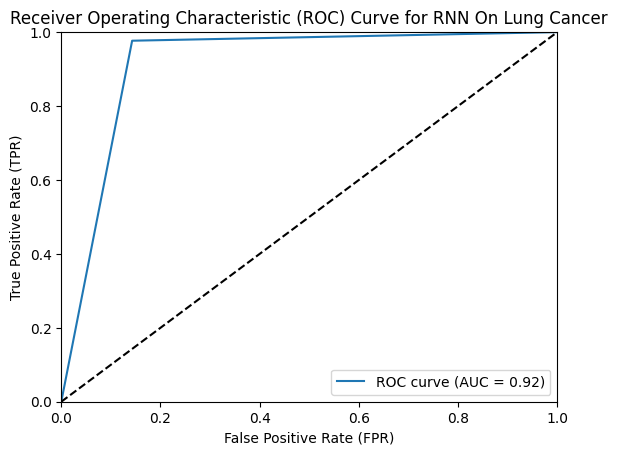

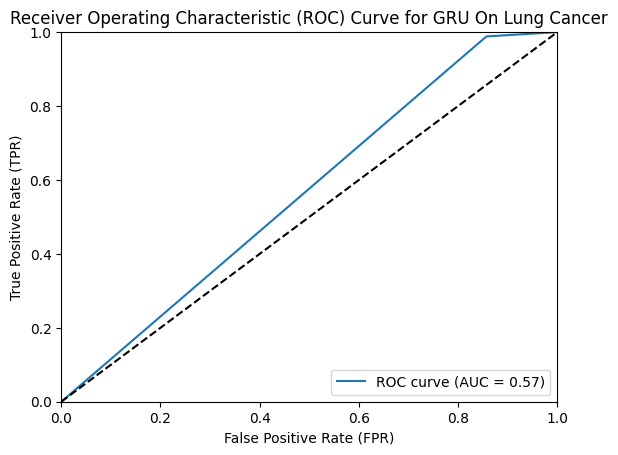

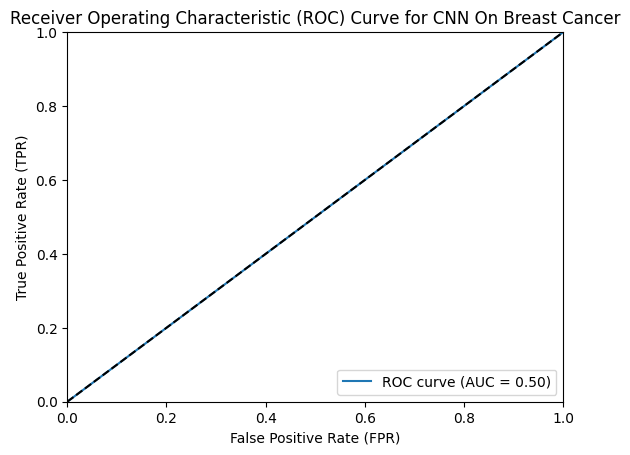

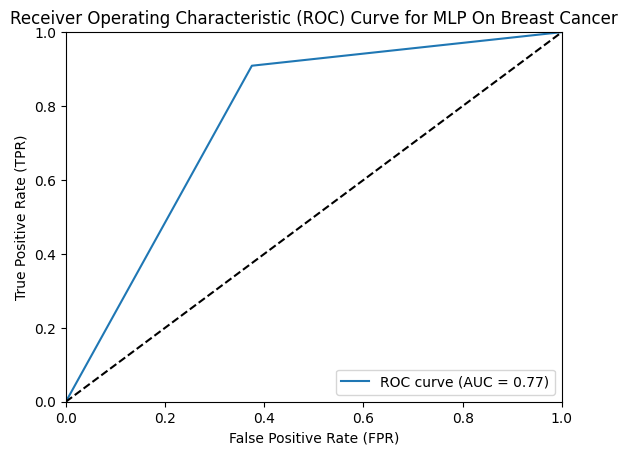

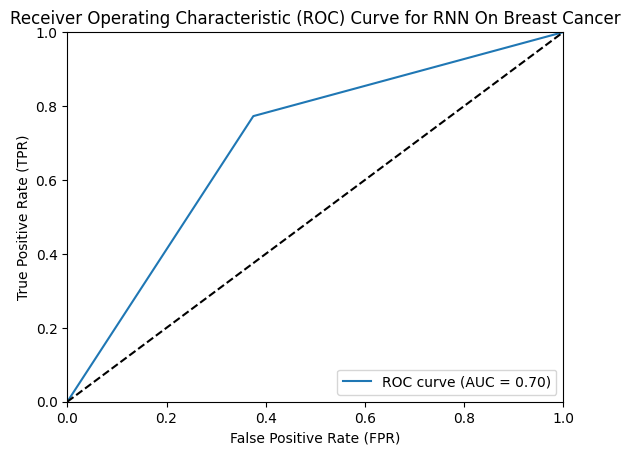

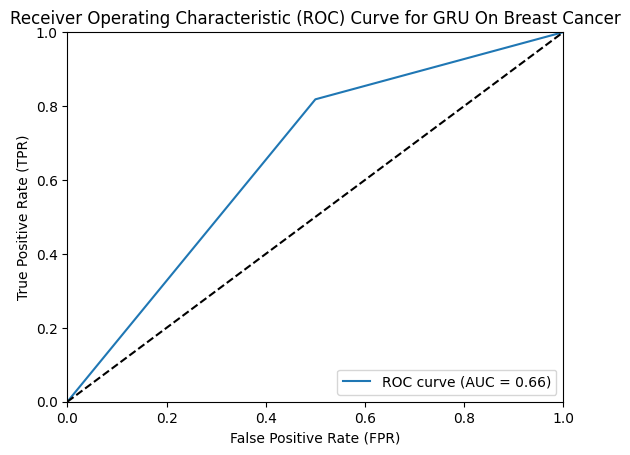

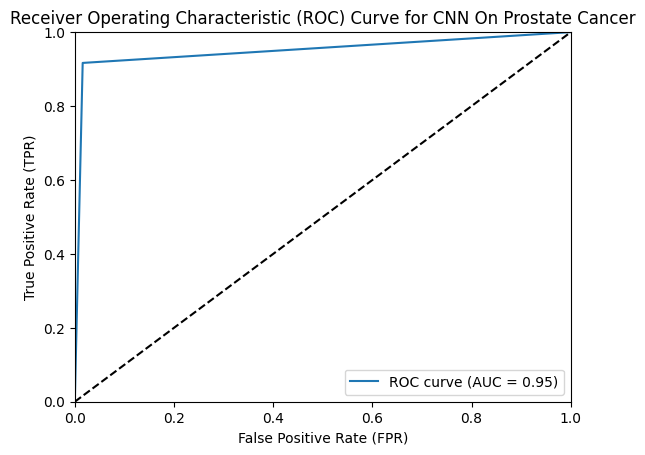

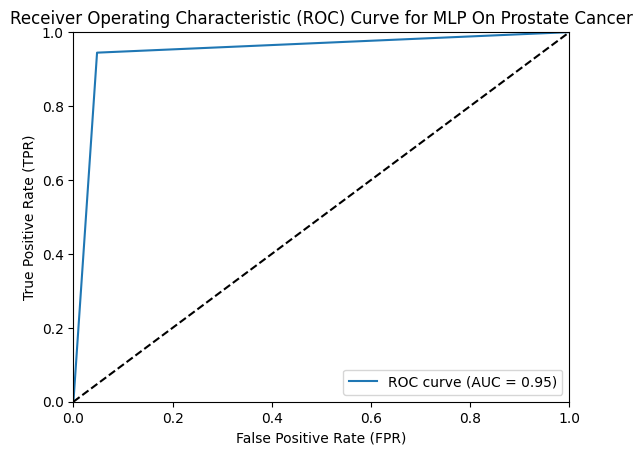

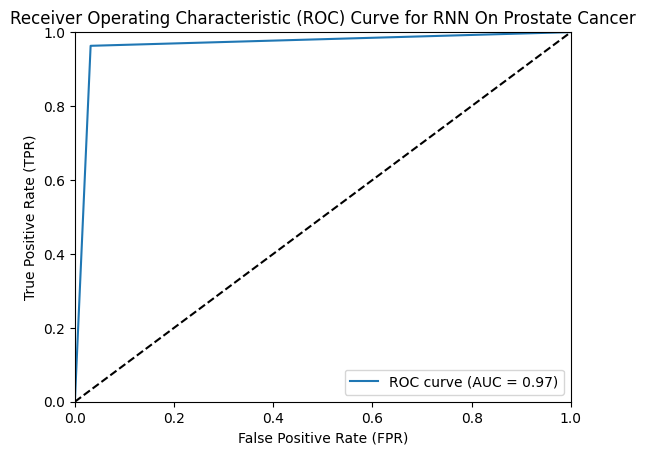

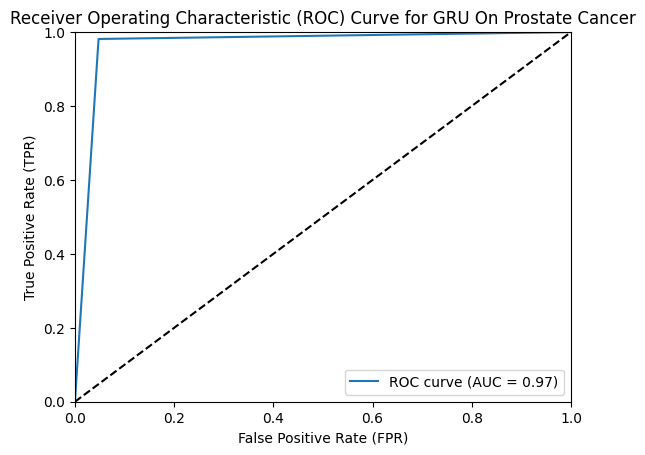

In [69]:
for i in range(len(ROC)):
  fpr,tpr,threshold=ROC[i]
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc(fpr, tpr))
  plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate (FPR)')
  plt.ylabel('True Positive Rate (TPR)')
  plt.title('Receiver Operating Characteristic (ROC) Curve for '+str(MODEL[i])+" On "+str(CANCER_DISEASES[i]))
  plt.legend(loc='lower right')
  plt.show()

In [70]:
for i in range(len(CM)):
  print(MODEL[i],' On ',CANCER_DISEASES[i],' Confusion Matrix')
  print(CM[i])

CNN  On  Lung Cancer  Confusion Matrix
[[ 6  1]
 [ 2 84]]
MLP  On  Lung Cancer  Confusion Matrix
[[ 1  6]
 [ 0 86]]
RNN  On  Lung Cancer  Confusion Matrix
[[ 6  1]
 [ 2 84]]
GRU  On  Lung Cancer  Confusion Matrix
[[ 1  6]
 [ 1 85]]
CNN  On  Breast Cancer  Confusion Matrix
[[ 0  8]
 [ 0 22]]
MLP  On  Breast Cancer  Confusion Matrix
[[ 5  3]
 [ 2 20]]
RNN  On  Breast Cancer  Confusion Matrix
[[ 5  3]
 [ 5 17]]
GRU  On  Breast Cancer  Confusion Matrix
[[ 4  4]
 [ 4 18]]
CNN  On  Prostate Cancer  Confusion Matrix
[[62  1]
 [ 9 99]]
MLP  On  Prostate Cancer  Confusion Matrix
[[ 60   3]
 [  6 102]]
RNN  On  Prostate Cancer  Confusion Matrix
[[ 61   2]
 [  4 104]]
GRU  On  Prostate Cancer  Confusion Matrix
[[ 60   3]
 [  2 106]]


# STEP 4

In [71]:
def evaluate(gan_model,df,ln,model_func,eps):
  MoDel=[]
  ACCS=[[],[],[],[],[],[]]
  EPS=[]
  Training_Size=[]
  for m_name,func in model_func.items():
    for ep in eps:
      for i in range(6):
        if i==1: # training on original data for initial ratio
          DF=df.copy(deep=True)
        else:
          #generate synthetic data acc to ratio
          gan_data=gan_model.sample(df.shape[0]*i)
          #merge data
          DF=pd.concat([df,gan_data],axis=0)
          #shuffle data
          DF=DF.sample(frac=1)
        x_train, x_test, y_train, y_test = train_test_split(DF.drop(ln,axis=1),DF[ln], test_size=0.3, random_state=42)
        _,_,_,_,_,_,_,acc,_,_=func(x_train, y_train, x_test, y_test, ep)
        ACCS[i].append(acc)
      MoDel.append(m_name)
      EPS.append(ep)
  return MoDel,EPS,ACCS

Accuracies of classifiers on mixed actual data and synthetic data on Breast Cancer data set,

In [78]:
Training_sizes_bc=[(bc_df.shape[0]*i)*0.3 for i in range(1,6)]
Epochs=[i for i in range(10,60,10)]

M,E,A=evaluate(gan_bc,bc_df,'benign_0__mal_1',models,Epochs)

33/33 [==============================] - 1s 4ms/step


In [79]:
Table_4={
    'Training Size':[int(ts) for i in range(4) for ts in Training_sizes_bc],
    'Epochs':E,
    'Model':M,
    'α = 0':A[0],
    'α = 1':A[1],
    'α = 2':A[2],
    'α = 3':A[3],
    'α = 4':A[4],
    'α = 5':A[5]
}
Table_4=pd.DataFrame(Table_4)

## Table 4

In [80]:
Table_4

,Training Size,Epochs,Model,α = 0,α = 1,α = 2,α = 3,α = 4,α = 5
0,170,10,CNN,0.877193,0.947368,0.857700,0.898975,0.902810,0.786341
1,341,20,CNN,0.766082,0.929825,0.937622,0.856515,0.902810,0.916098
2,512,30,CNN,0.964912,0.964912,0.941520,0.897511,0.918033,0.911220
3,682,40,CNN,0.900585,0.976608,0.918129,0.948755,0.937939,0.912195
4,853,50,CNN,0.929825,0.970760,0.922027,0.907760,0.932084,0.930732
5,170,10,MLP,0.941520,0.947368,0.867446,0.853587,0.858314,0.864390
6,341,20,MLP,0.900585,0.947368,0.875244,0.856515,0.847775,0.792195
7,512,30,MLP,0.941520,0.947368,0.832359,0.887262,0.819672,0.845854
8,682,40,MLP,0.929825,0.947368,0.808967,0.840410,0.843091,0.857561
9,853,50,MLP,0.923977,0.947368,0.847953,0.860908,0.848946,0.877073


In [81]:
Table_4.to_csv('TABLE_4.csv',index=False)

Accuracies of classifiers on mixed actual data and synthetic data on Prostate Cancer data set,

In [82]:
Training_sizes_pc=[(pc_df.shape[0]*i)*0.3 for i in range(1,6)]
Epochs=[i for i in range(4,9)]

M,E,A=evaluate(gan_pc,pc_df,'diagnosis_result',models,Epochs)

6/6 [==============================] - 0s 3ms/step


In [83]:
Table_5={
    'Training Size':[int(ts) for i in range(4) for ts in Training_sizes_pc],
    'Epochs':E,
    'Model':M,
    'β = 0':A[0],
    'β = 1':A[1],
    'β = 2':A[2],
    'β = 3':A[3],
    'β = 4':A[4],
    'β = 5':A[5]
}
Table_5=pd.DataFrame(Table_5)

## Table 5

In [84]:
Table_5

,Training Size,Epochs,Model,β = 0,β = 1,β = 2,β = 3,β = 4,β = 5
0,30,4,CNN,0.666667,0.733333,0.633333,0.633333,0.373333,0.677778
1,60,5,CNN,0.600000,0.733333,0.688889,0.666667,0.733333,0.611111
2,90,6,CNN,0.666667,0.266667,0.700000,0.600000,0.466667,0.677778
3,120,7,CNN,0.733333,0.733333,0.666667,0.716667,0.693333,0.611111
4,150,8,CNN,0.300000,0.733333,0.666667,0.750000,0.426667,0.722222
5,30,4,MLP,0.366667,0.833333,0.800000,0.841667,0.866667,0.655556
6,60,5,MLP,0.733333,0.833333,0.766667,0.783333,0.553333,0.800000
7,90,6,MLP,0.400000,0.833333,0.888889,0.908333,0.906667,0.733333
8,120,7,MLP,0.766667,0.833333,0.555556,0.825000,0.880000,0.727778
9,150,8,MLP,0.866667,0.833333,0.833333,0.766667,0.833333,0.788889


In [85]:
Table_5.to_csv('TABLE_5.csv',index=False)

Accuracies of classifiers on mixed actual data and synthetic data on Lung Cancer data set,

In [86]:
Training_sizes_lc=[(lc_df.shape[0]*i)*0.3 for i in range(1,6)]
Epochs=[i for i in range(10,60,10)]

M,E,A=evaluate(gan_lc,lc_df,'LUNG_CANCER',models,Epochs)

18/18 [==============================] - 0s 2ms/step


In [87]:
Table_6={
    'Training Size':[int(ts) for i in range(4) for ts in Training_sizes_lc],
    'Epochs':E,
    'Model':M,
    'δ = 0':A[0],
    'δ = 1':A[1],
    'δ = 2':A[2],
    'δ = 3':A[3],
    'δ = 4':A[4],
    'δ = 5':A[5]
}
Table_6=pd.DataFrame(Table_6)

## Table 6

In [88]:
Table_6

,Training Size,Epochs,Model,δ = 0,δ = 1,δ = 2,δ = 3,δ = 4,δ = 5
0,92,10,CNN,0.892473,0.924731,0.874552,0.843666,0.868534,0.865350
1,185,20,CNN,0.903226,0.935484,0.881720,0.854447,0.862069,0.892280
2,278,30,CNN,0.913978,0.935484,0.885305,0.865229,0.868534,0.879713
3,370,40,CNN,0.870968,0.946237,0.892473,0.905660,0.890086,0.868941
4,463,50,CNN,0.913978,0.956989,0.896057,0.886792,0.885776,0.852783
5,92,10,MLP,0.838710,0.935484,0.845878,0.851752,0.879310,0.863555
6,185,20,MLP,0.924731,0.935484,0.874552,0.873315,0.868534,0.861759
7,278,30,MLP,0.870968,0.935484,0.892473,0.870620,0.896552,0.865350
8,370,40,MLP,0.870968,0.935484,0.874552,0.867925,0.864224,0.876122
9,463,50,MLP,0.849462,0.935484,0.870968,0.867925,0.875000,0.845601


In [89]:
Table_6.to_csv('TABLE_6.csv',index=False)